In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We have a binary classification problem here 
and the target variable is the 'Exited' with two outputs the '1' and '0'.

'Churn modeling = predicting which customers are most likely to leave, so a business can take action to keep them.' So in this case i think that this business is a bank.

In [3]:
## Divide the dataset into independent and dependent features

X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
## Feature Engineering
Geography= pd.get_dummies(X['Geography'], dtype=int,drop_first=True)
Gender = pd.get_dummies(X['Gender'], dtype=int, drop_first= True)

In [7]:
X = X.drop(['Geography','Gender'],axis = 1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
#Concatenate the gender and geography in order to be in the last two columns
X = pd.concat([X, Geography,Gender], axis =1)

In [10]:
#Splitting the dataset into trainining and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train.shape

(8000, 11)

In [ ]:
#Let s create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU    # Activation functions
from tensorflow.keras.layers import Dropout

In [14]:
#Let s initialize the ANN
classifier = Sequential()

In [15]:
#Adding the input Layer
classifier.add(Dense(units = 11, activation='relu')) #units = 11 means neurons

In [39]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [40]:
#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [41]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid')) 
#We use sigmoid activation function since it is a binary classification problem

In [42]:
# I want to provide my own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [43]:
## Early Stopping :Stop training when a monitored metric has stopped improving.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics = ['accuracy']) 

In [45]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10, epochs = 1000, callbacks = early_stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8556 - loss: 0.3904 - val_accuracy: 0.8425 - val_loss: 0.3934
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8636 - loss: 0.3477 - val_accuracy: 0.8413 - val_loss: 0.3945
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8649 - loss: 0.3446 - val_accuracy: 0.8455 - val_loss: 0.4069
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8582 - loss: 0.3442 - val_accuracy: 0.8406 - val_loss: 0.4222
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8643 - loss: 0.3375 - val_accuracy: 0.8440 - val_loss: 0.4340
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8643 - loss: 0.3387 - val_accuracy: 0.8387 - val_loss: 0.4079
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8599 - loss: 0.3497 - val_accuracy: 0.8379 - val_loss: 0.4116
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8647 - loss: 0.3407 - 

In [46]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

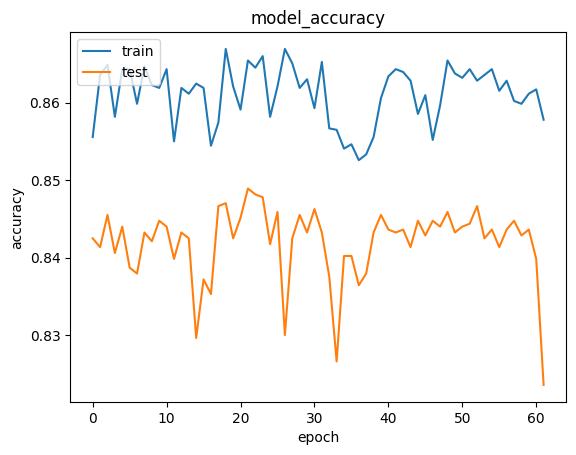

In [47]:
#Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

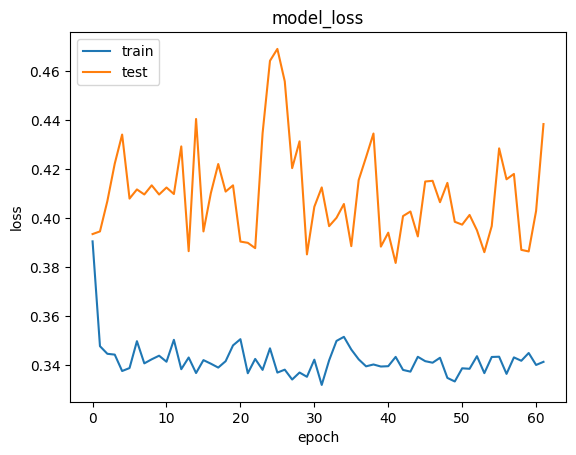

In [48]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [49]:
#Making the predicitons and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1454,  153],
       [ 179,  214]])

In [51]:
## Clalculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [52]:
score

0.834

In [53]:
# I wanna store the weights from the neural network that i ve create
classifier.get_weights()

[array([[-2.0186251e-02,  1.8337655e-01,  2.3264272e+00,  1.2927039e+00,
          2.0039029e-01,  2.0341144e+00, -1.7639353e+00,  2.0764797e+00,
          3.0725679e+00,  1.7208847e+00, -1.6567369e+00],
        [-1.0873856e+01, -7.8526491e-01,  6.9323964e+00, -4.2275567e+00,
         -1.5375717e+00, -4.4145164e+00,  4.4660568e+00,  1.0032816e+00,
          5.8891664e+00, -3.8631260e+00,  5.9019151e+00],
        [-3.6741936e-01,  9.8995529e-03,  2.9589982e+00,  3.4595885e+00,
          7.9315150e-01,  2.0701639e-01, -7.9760903e-01,  2.7795951e+00,
          8.0527562e-01,  5.6698471e-01,  1.4082778e+00],
        [-1.7420852e+00, -8.0724211e+00, -2.3889725e+00,  1.5155011e+00,
          1.6885285e+00,  5.5920672e+00,  1.8498986e+00,  2.7099288e+00,
         -1.0581269e+00, -5.7487030e+00, -2.1215680e+00],
        [ 2.7960815e+00, -9.8501549e+00, -5.4198246e+00, -3.6003470e+00,
          1.0193195e+01, -2.1880248e+00, -3.4491558e+00, -1.4049776e+00,
         -4.6961123e-01,  1.1839926e+0